In [24]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet("../../../Data/2022_indicators/processed_Dummies_Stand_2022.parquet")
df

,CHILDREN_1.0,CHILDREN_2.0,CHILDREN_3.0,CHILDREN_4.0,CHILDREN_5.0,CHILDREN_6.0,CHILDREN_7.0,CHILDREN_8.0,CHILDREN_9.0,CHILDREN_10.0,...,_AGE80,_STSTR,WEIGHT2,_LLCPWT,SLEPTIM1,PHYSHLTH,_DRNKWK2,HTM4,_WT2RAKE,_MICHD
342,0,0,0,0,0,0,0,0,0,0,...,0.725882,-1.881422,-0.109000,0.350352,0.185031,-1.447494,-0.152674,-0.998139,0.633109,2.0
343,0,0,0,0,0,0,0,0,0,0,...,0.894640,-1.881422,0.018999,0.179652,-0.239291,0.774994,-0.152674,0.689488,0.633109,2.0
344,1,0,0,0,0,0,0,0,0,0,...,0.950892,-1.881422,-0.017924,-0.091585,0.043590,-0.759581,-0.152674,1.158273,0.633109,2.0
345,0,0,0,0,0,0,0,0,0,0,...,1.288407,-1.881422,0.092845,-0.104970,0.043590,0.774994,-0.089098,1.345787,0.633109,2.0
346,0,0,0,0,0,0,0,0,0,0,...,1.400912,-1.881422,-0.005616,-0.168564,0.185031,-1.421035,-0.152674,-0.060568,-0.008318,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435819,0,0,0,0,0,0,0,0,0,0,...,-0.736683,1.645614,-0.190231,-0.324484,0.043590,0.774994,-0.135985,-1.279410,-0.547023,2.0
435820,0,0,0,0,0,0,0,0,0,0,...,0.725882,1.645620,-0.037616,-0.466170,-0.239291,-1.500410,-0.152674,0.689488,-0.547023,1.0
435822,0,0,0,0,0,0,0,0,0,0,...,1.400912,1.645614,-0.128692,-0.481484,-0.097850,0.483954,-0.134157,-1.466924,-0.547023,2.0
435823,0,0,0,0,0,0,0,0,0,0,...,0.050852,1.645614,0.009153,-0.411495,0.043590,-1.368119,-0.141548,0.689488,-0.547023,1.0


In [3]:
target = df._MICHD
target.value_counts()

2.0    321949
1.0     33162
Name: _MICHD, dtype: int64

In [4]:
df = df.drop("_MICHD", axis =1)
duplicate_cols_to_drop = ["_RFHLTH_1.0",  "_SEX_2.0", "GENHLTH_2.0",  "GENHLTH_5.0", "GENHLTH_3.0", "_SEX_1.0" ]
df = df.drop(duplicate_cols_to_drop, axis=1)
df

,CHILDREN_1.0,CHILDREN_2.0,CHILDREN_3.0,CHILDREN_4.0,CHILDREN_5.0,CHILDREN_6.0,CHILDREN_7.0,CHILDREN_8.0,CHILDREN_9.0,CHILDREN_10.0,...,HEIGHT3,_AGE80,_STSTR,WEIGHT2,_LLCPWT,SLEPTIM1,PHYSHLTH,_DRNKWK2,HTM4,_WT2RAKE
342,0,0,0,0,0,0,0,0,0,0,...,-0.458355,0.725882,-1.881422,-0.109000,0.350352,0.185031,-1.447494,-0.152674,-0.998139,0.633109
343,0,0,0,0,0,0,0,0,0,0,...,-0.278831,0.894640,-1.881422,0.018999,0.179652,-0.239291,0.774994,-0.152674,0.689488,0.633109
344,1,0,0,0,0,0,0,0,0,0,...,2.029329,0.950892,-1.881422,-0.017924,-0.091585,0.043590,-0.759581,-0.152674,1.158273,0.633109
345,0,0,0,0,0,0,0,0,0,0,...,2.054975,1.288407,-1.881422,0.092845,-0.104970,0.043590,0.774994,-0.089098,1.345787,0.633109
346,0,0,0,0,0,0,0,0,0,0,...,-0.355770,1.400912,-1.881422,-0.005616,-0.168564,0.185031,-1.421035,-0.152674,-0.060568,-0.008318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435819,0,0,0,0,0,0,0,0,0,0,...,-0.484001,-0.736683,1.645614,-0.190231,-0.324484,0.043590,0.774994,-0.135985,-1.279410,-0.547023
435820,0,0,0,0,0,0,0,0,0,0,...,-0.278831,0.725882,1.645620,-0.037616,-0.466170,-0.239291,-1.500410,-0.152674,0.689488,-0.547023
435822,0,0,0,0,0,0,0,0,0,0,...,-0.509647,1.400912,1.645614,-0.128692,-0.481484,-0.097850,0.483954,-0.134157,-1.466924,-0.547023
435823,0,0,0,0,0,0,0,0,0,0,...,-0.278831,0.050852,1.645614,0.009153,-0.411495,0.043590,-1.368119,-0.141548,0.689488,-0.547023


In [5]:
# create logistic regressor 
lregCV = LogisticRegressionCV(n_jobs=-1,max_iter=10000)

In [6]:
# fit decision tree classifier
lregCV.fit(df,target)

LogisticRegressionCV(max_iter=10000, n_jobs=-1)

In [7]:
# feature coefficients
coef = lregCV.coef_[0]
coef = pd.Series(coef,index=df.columns).sort_values(ascending=False)

In [8]:
coef

CVDSTRK3_2.0    0.404325
GENHLTH_1.0     0.348748
SEXVAR_2.0      0.320917
CHCKDNY2_2.0    0.224708
DIABETE4_3.0    0.199814
                  ...   
PERSDOC3_2.0   -0.282729
SEXVAR_1.0     -0.321366
CVDSTRK3_1.0   -0.370818
_RFHLTH_2.0    -0.435334
_AGE80         -0.505320
Length: 495, dtype: float64

In [9]:
zero_conditon = (coef >= -0.01) & (coef <= 0.01)
coef = coef[~zero_conditon]

In [10]:
coef.sort_values(ascending=False)

CVDSTRK3_2.0    0.404325
GENHLTH_1.0     0.348748
SEXVAR_2.0      0.320917
CHCKDNY2_2.0    0.224708
DIABETE4_3.0    0.199814
                  ...   
PERSDOC3_2.0   -0.282729
SEXVAR_1.0     -0.321366
CVDSTRK3_1.0   -0.370818
_RFHLTH_2.0    -0.435334
_AGE80         -0.505320
Length: 286, dtype: float64

In [11]:
coef_filtered = pd.concat([coef.head(10), coef.tail(10)])
coef_filtered

CVDSTRK3_2.0     0.404325
GENHLTH_1.0      0.348748
SEXVAR_2.0       0.320917
CHCKDNY2_2.0     0.224708
DIABETE4_3.0     0.199814
CHCCOPD3_2.0     0.180074
PERSDOC3_1.0     0.149562
PERSDOC3_3.0     0.130403
EMPLOY1_1.0      0.126262
MARITAL_5.0      0.123251
_AGEG5YR_13.0   -0.152755
CHCCOPD3_1.0    -0.165267
DIABETE4_1.0    -0.199751
CHCKDNY2_1.0    -0.200014
CHECKUP1_1.0    -0.203077
PERSDOC3_2.0    -0.282729
SEXVAR_1.0      -0.321366
CVDSTRK3_1.0    -0.370818
_RFHLTH_2.0     -0.435334
_AGE80          -0.505320
dtype: float64

In [57]:
feature_dict= {
    "CVDSTRK3_2.0": "No Stroke",
    "GENHLTH_1.0": "General Health: Excellent",
    "CHCKDNY2_2.0":"No Kidney Disease",
    "DIABETE4_3.0": "No diabetes",
    "SEXVAR_2.0":  "Female", 
    "CHCCOPD3_2.0": "No C.O.P.D.",
    "PERSDOC3_1.0": "Has Personal Health Care Provider", 
    "PERSDOC3_3.0": "No Personal Health Care Provider",
    "SEXVAR_1.0": "Male", 
    "DIABETE4_1.0": "Has Diabetes", 
    "CHCKDNY2_1.0": "Has Kidney Disease",
    "CHECKUP1_1.0": "Last Visited Doc in past Year",
    "GENHLTH_4.0": "Fair General Health",
    "_RFHLTH_2.0": "Adults with Fair or Poor Health",
    "PERSDOC3_2.0": "More than 1 Personal Heath Provider",
    "CVDSTRK3_1.0": "Had a Stroke",
    "_AGE80": "Age",
    "EMPLOY1_1.0": "Employed For Wages",
    "MARITAL_5.0": "Never Married",
    "CHCCOPD3_1.0": "Has C.O.P.D",
    "_AGEG5YR_13.0": "Age 80+", 
    "DIFFWALK_1.0": "Has Difficulty Walking",
    "HAVARTH4_2.0": "No Arthritis",
    "_PRACE2_3.0": "Indian or Alaskan Native"
    
}

# duplicate_cols_to_drop = ["_RFHLTH_1.0",  "_SEX_2.0", "GENHLTH_2.0",  "GENHLTH_5.0", "GENHLTH_3.0" ]

In [51]:
mapped_columns = [feature_dict[col] if col in feature_dict else col for col in coef_filtered.index]
coef_filtered.index = mapped_columns
coef_filtered

No Stroke                              0.404325
General Health: Excellent              0.348748
Female                                 0.320917
No Kidney Disease                      0.224708
No diabetes                            0.199814
No C.O.P.D.                            0.180074
Has Personal Health Care Provider      0.149562
No Personal Health Care Provider       0.130403
Employed For Wages                     0.126262
Never Married                          0.123251
Age 80+                               -0.152755
Has C.O.P.D                           -0.165267
Has Diabetes                          -0.199751
Has Kidney Disease                    -0.200014
Last Visited Doc in past Year         -0.203077
More than 1 Personal Heath Provider   -0.282729
Male                                  -0.321366
Had a Stroke                          -0.370818
Adults with Fair or Poor Health       -0.435334
Age                                   -0.505320
dtype: float64

No Stroke                              0.404325
General Health: Excellent              0.348748
Female                                 0.320917
No Kidney Disease                      0.224708
No diabetes                            0.199814
No C.O.P.D.                            0.180074
Has Personal Health Care Provider      0.149562
No Personal Health Care Provider       0.130403
Employed For Wages                     0.126262
Never Married                          0.123251
Age 80+                               -0.152755
Has C.O.P.D                           -0.165267
Has Diabetes                          -0.199751
Has Kidney Disease                    -0.200014
Last Visited Doc in past Year         -0.203077
More than 1 Personal Heath Provider   -0.282729
Male                                  -0.321366
Had a Stroke                          -0.370818
Adults with Fair or Poor Health       -0.435334
Age                                   -0.505320
dtype: float64

Text(0.5, 0, 'feature weights')

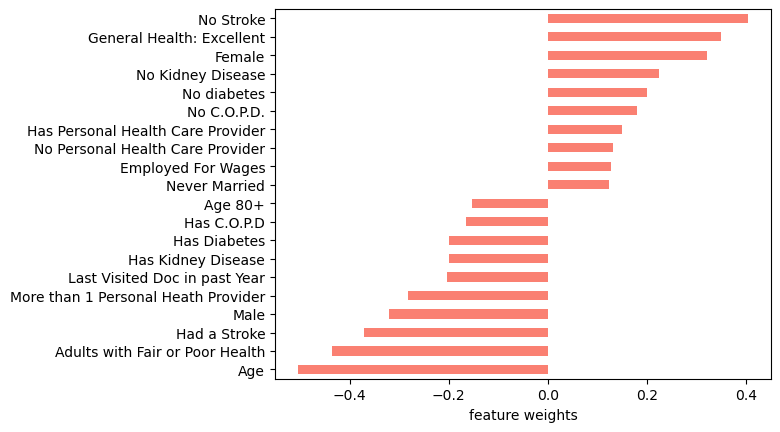

In [23]:
display(coef_filtered.sort_values(ascending=False))
coef_filtered.sort_values(ascending=True).plot.barh(color='salmon')
plt.xlabel('feature weights')

In [35]:
# compute accuracy rate
accuracy_rate = lregCV.score(df,target)
print("Accuracy Logistic Regression", accuracy_rate)

Accuracy Logistic Regression 0.9093382069268482


In [25]:
# initialize tree
dtree = DecisionTreeClassifier(random_state=0)

# define parameter grid to search for lowest validation error rate
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

# initialize cross-validation
dtreeCV = GridSearchCV(dtree,
                      param_grid=parameters,
                      return_train_score=True,
                      n_jobs=-1)

In [26]:
# fit tree using cross-validation to select best tree
dtreeCV.fit(df,target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [27]:
# readout best parameter value
dtreeCV.best_params_

{'max_depth': 5}

In [34]:
acc = dtreeCV.score(df,target)
print('accuracy on training set',acc.round(3))
print("Validation Score", dtreeCV.best_score_)
print("Baseline", (target.value_counts()[2.0] / target.value_counts().sum()))

accuracy on training set 0.908
Validation Score 0.9080343903704355
Baseline 0.9066151147106116


In [32]:
target.value_counts()

2.0    321949
1.0     33162
Name: _MICHD, dtype: int64

In [58]:
dtree = dtreeCV.best_estimator_
feature_importances = dtree.feature_importances_
feature_importances = pd.Series(feature_importances,index=df.columns).sort_values(ascending=False).head(15)

In [59]:
mapped_columns = [feature_dict[col] if col in feature_dict else col for col in feature_importances.index]
feature_importances.index = mapped_columns
feature_importances

Age                                    0.364024
Adults with Fair or Poor Health        0.335163
No Stroke                              0.141042
Male                                   0.052028
Female                                 0.024497
More than 1 Personal Heath Provider    0.023627
No C.O.P.D.                            0.022879
Has Diabetes                           0.010335
Has Difficulty Walking                 0.008603
No Kidney Disease                      0.008170
Fair General Health                    0.003683
Has C.O.P.D                            0.003280
No Arthritis                           0.001074
General Health: Excellent              0.000844
Indian or Alaskan Native               0.000750
dtype: float64

Text(0.5, 1.0, 'Feature Importance')

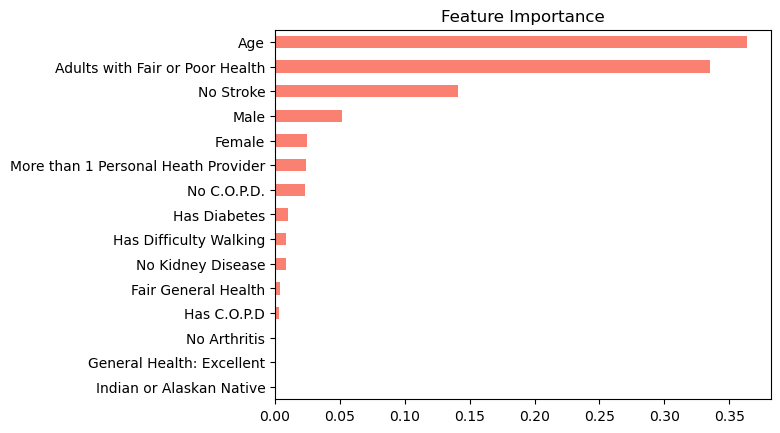

In [60]:
feature_importances.sort_values().plot.barh(color='salmon')
plt.title('Feature Importance')

In [65]:
df.rename(columns=feature_dict, inplace=True)



In [66]:
dtree_string = export_text(dtree,feature_names=list(df.columns),decimals=1,spacing=5)
print(dtree_string)

|----- Adults with Fair or Poor Health <= 0.5
|     |----- Age <= 0.6
|     |     |----- No Stroke <= 0.5
|     |     |     |----- Has C.O.P.D <= 0.5
|     |     |     |     |----- Female <= 0.5
|     |     |     |     |     |----- class: 2.0
|     |     |     |     |----- Female >  0.5
|     |     |     |     |     |----- class: 2.0
|     |     |     |----- Has C.O.P.D >  0.5
|     |     |     |     |----- General Health: Excellent <= 0.5
|     |     |     |     |     |----- class: 2.0
|     |     |     |     |----- General Health: Excellent >  0.5
|     |     |     |     |     |----- class: 1.0
|     |     |----- No Stroke >  0.5
|     |     |     |----- Age <= -0.1
|     |     |     |     |----- Has Diabetes <= 0.5
|     |     |     |     |     |----- class: 2.0
|     |     |     |     |----- Has Diabetes >  0.5
|     |     |     |     |     |----- class: 2.0
|     |     |     |----- Age >  -0.1
|     |     |     |     |----- Has Diabetes <= 0.5
|     |     |     |     |     |----- 

In [61]:
# display tree
dot_data = export_graphviz(dtree,
            out_file=None,
            feature_names=df.columns,
            # class_names = ['bad','good'],
            proportion=True,
            impurity=False,
            filled=True,
            rounded=True)
graph = graphviz.Source(dot_data)
# graph.render('RedWine')
graph

NameError: name 'export_graphviz' is not defined